In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df= pd.read_csv('cardio.csv',sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
2,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
3,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
4,8,21914,1,151,67.0,120,80,2,2,0,0,0,0


In [4]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69997 entries, 0 to 69996
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69997 non-null  int64  
 1   age          69997 non-null  int64  
 2   gender       69997 non-null  int64  
 3   height       69997 non-null  int64  
 4   weight       69997 non-null  float64
 5   ap_hi        69997 non-null  int64  
 6   ap_lo        69997 non-null  int64  
 7   cholesterol  69997 non-null  int64  
 8   gluc         69997 non-null  int64  
 9   smoke        69997 non-null  int64  
 10  alco         69997 non-null  int64  
 11  active       69997 non-null  int64  
 12  cardio       69997 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['age']=df['age']/365

In [9]:
categorical_values = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [10]:
np.round(df.describe(),2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69997.00,69997.00,69997.00,69997.00,69997.0,69997.00,69997.00,69997.00,69997.00,69997.00,69997.00,69997.0,69997.0
mean,49974.56,53.34,1.35,164.36,74.2,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28850.07,6.76,0.48,8.21,14.4,154.01,188.48,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,29.58,1.00,55.00,10.0,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25009.00,48.39,1.00,159.00,65.0,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50004.00,53.98,1.00,165.00,72.0,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74890.00,58.43,2.00,170.00,82.0,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,64.97,2.00,250.00,200.0,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


In [11]:
#np.round(df.describe(include="string"),2)

<Axes: xlabel='cardio', ylabel='count'>

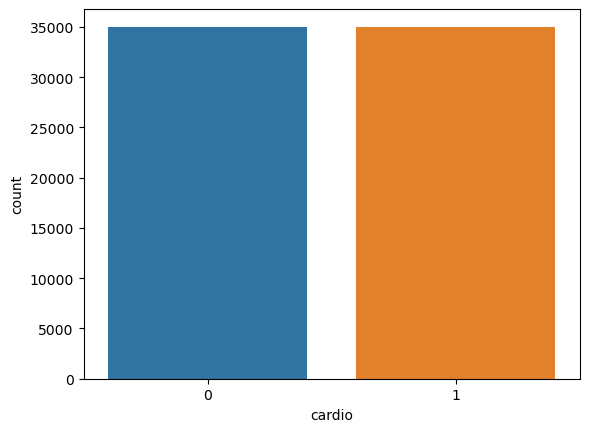

In [12]:
sns.countplot(data=df, x='cardio')

From the avove chart we can conclude that there is no class imbalance.

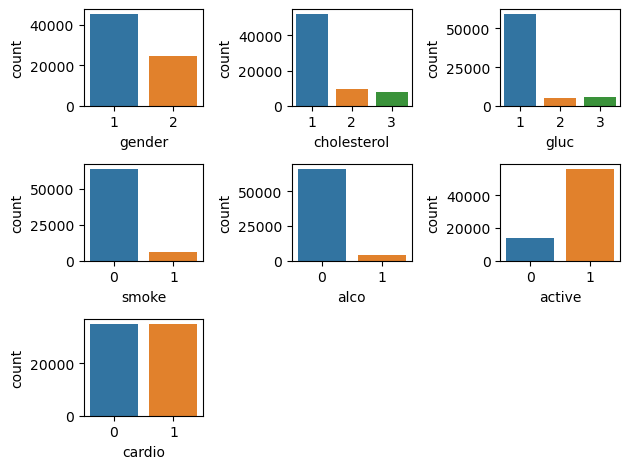

In [13]:
for i, col in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)

plt.tight_layout()
plt.show()

In [14]:
np.round(df.describe(),2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69997.00,69997.00,69997.00,69997.00,69997.0,69997.00,69997.00,69997.00,69997.00,69997.00,69997.00,69997.0,69997.0
mean,49974.56,53.34,1.35,164.36,74.2,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28850.07,6.76,0.48,8.21,14.4,154.01,188.48,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,29.58,1.00,55.00,10.0,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25009.00,48.39,1.00,159.00,65.0,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50004.00,53.98,1.00,165.00,72.0,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74890.00,58.43,2.00,170.00,82.0,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,64.97,2.00,250.00,200.0,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


# Remove outliers

In [16]:
# Calculate Z-scores 
z_scores_weight = (df['weight'] - df['weight'].mean()) / df['weight'].std()
z_scores_height = (df['height'] - df['height'].mean()) / df['height'].std()

threshold = 3

# Find indices of outliers
outliers_weight = z_scores_weight.abs() > threshold
outliers_height = z_scores_height.abs() > threshold

# Remove outliers from the DataFrame
df = df[~(outliers_weight | outliers_height)]

In [17]:
np.round(df.describe())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0,69025.0
mean,49968.0,53.0,1.0,164.0,74.0,129.0,96.0,1.0,1.0,0.0,0.0,1.0,0.0
std,28847.0,7.0,0.0,8.0,13.0,155.0,189.0,1.0,1.0,0.0,0.0,0.0,0.0
min,0.0,30.0,1.0,140.0,32.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,25008.0,48.0,1.0,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
50%,49996.0,54.0,1.0,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
75%,74858.0,58.0,2.0,170.0,82.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0
max,99999.0,65.0,2.0,188.0,117.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,1.0


In [18]:
y = df.cardio 
drop_cols = ['id','cardio']
x = df.drop(df[drop_cols], axis=1) 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69025 entries, 0 to 69996
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69025 non-null  int64  
 1   age          69025 non-null  float64
 2   gender       69025 non-null  int64  
 3   height       69025 non-null  int64  
 4   weight       69025 non-null  float64
 5   ap_hi        69025 non-null  int64  
 6   ap_lo        69025 non-null  int64  
 7   cholesterol  69025 non-null  int64  
 8   gluc         69025 non-null  int64  
 9   smoke        69025 non-null  int64  
 10  alco         69025 non-null  int64  
 11  active       69025 non-null  int64  
 12  cardio       69025 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


<Axes: xlabel='features', ylabel='value'>

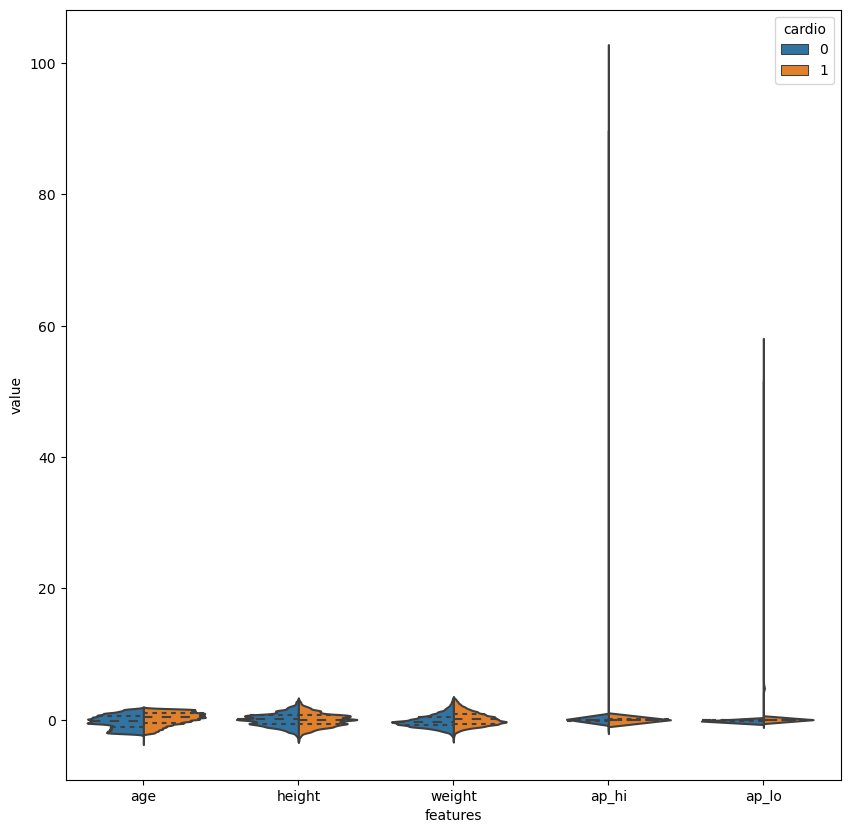

In [20]:
data = x
cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
numeric_data = x[cols]
numeric_data_std = ((numeric_data-numeric_data.mean())/numeric_data.std())
numeric_data = pd.concat([y, numeric_data_std.iloc[:]], axis=1)
# converting data from long to wide format
numeric_data = pd.melt(numeric_data,id_vars='cardio',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value',hue='cardio',data=numeric_data, split=True, inner='quart')


In [21]:
x['BMI'] = x['weight'] / ((x['height'] / 100) ** 2)  # Convert height to meters

# Remove 'height' and 'weight' columns
x.drop(['height', 'weight'], axis=1, inplace=True)

print(x.head())

         age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0  50.391781       2    110     80            1     1      0     0       1   
1  51.663014       1    130     70            3     1      0     0       0   
2  48.282192       2    150    100            1     1      0     0       1   
3  47.873973       1    100     60            1     1      0     0       0   
4  60.038356       1    120     80            2     2      0     0       0   

         BMI  
0  21.967120  
1  23.507805  
2  28.710479  
3  23.011177  
4  29.384676  


<Figure size 1000x1000 with 0 Axes>

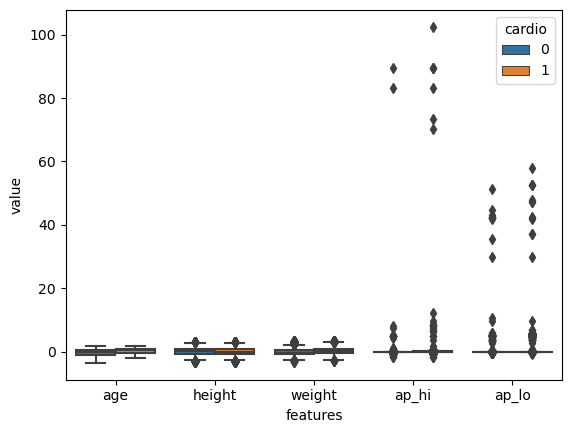

<Figure size 1000x1000 with 0 Axes>

In [22]:
sns.boxplot(x='features' , y='value', hue='cardio', data=numeric_data)
plt.figure(figsize=(10,10))

In [23]:
x.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,50.391781,2,110,80,1,1,0,0,1,21.967120
1,51.663014,1,130,70,3,1,0,0,0,23.507805
2,48.282192,2,150,100,1,1,0,0,1,28.710479
3,47.873973,1,100,60,1,1,0,0,0,23.011177
4,60.038356,1,120,80,2,2,0,0,0,29.384676


In [24]:
# Calculating Z-score
z_scores_hi = (df['ap_hi'] - df['ap_hi'].mean()) / df['ap_hi'].std()
z_scores_lo = (df['ap_lo'] - df['ap_lo'].mean()) / df['ap_lo'].std()

threshold = 3

# Find indices of outliers
outliers_hi = z_scores_hi.abs() > threshold
outliers_lo = z_scores_lo.abs() > threshold

# Remove outliers from the DataFrame
df = df[~(outliers_hi | outliers_lo)]


In [25]:
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model selection and training
model = RandomForestClassifier( random_state=0,max_depth=10)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7337196667873959
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6883
           1       0.76      0.68      0.72      6922

    accuracy                           0.73     13805
   macro avg       0.74      0.73      0.73     13805
weighted avg       0.74      0.73      0.73     13805



In [26]:
model.feature_importances_

array([0.13847864, 0.00643865, 0.47898725, 0.18247007, 0.09107334,
       0.01310397, 0.00594798, 0.00434585, 0.00905803, 0.07009622])

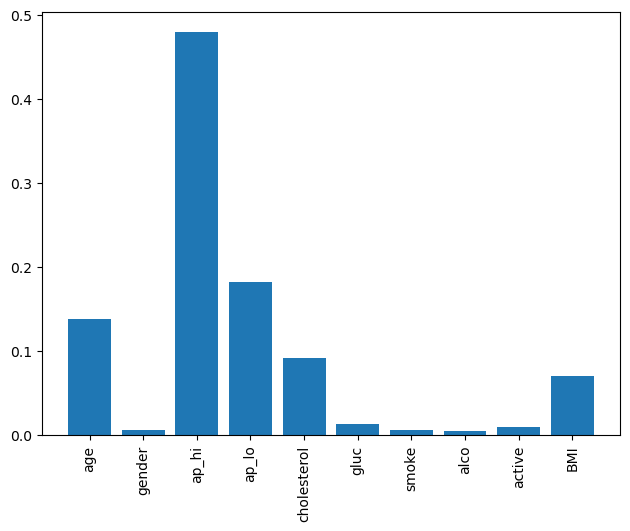

In [27]:
plt.bar((list(x.columns)), model.feature_importances_)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [28]:
model.score(X_train,y_train)

0.7565918145599421

In [29]:
model.score(X_test,y_test)

0.7337196667873959